# Student Information
Name:黃廉傑

Student ID:111062644

GitHub ID:willy20104368

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

# Part1:Take Home Exercises

### >>> Exercise 2 (take home):
Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information.

In [2]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import helpers.data_mining_helpers as dmh

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))


In [3]:
#print every five record
X[::5] 

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
15    From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1   
20    From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...         3   
...                                                 ...       ...   
2235  From: dougb@comm.mot.com (Doug Bank) Subject: ...         2   
2240  From: balick@nynexst.com (Daphne Balick) Subje...         2   
2245  From: nyeda@cnsvax.uwec.edu (David Nye) Subjec...         2   
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   

               category_name  
0              comp.graphics  
5     soc.religion.christian  
10    soc.religion.christian  
15             comp.graphics  
20    soc.religion.christian  
...                      ...  
2235                 sci.med  
2240                 sci.med  
2245                 sci.med  
2250             alt.atheism  
2255                 sci.med  

[452 rows x 3 columns]

In [4]:
#print 2nd, 4th, 6th record's 1st and 3rd column
X.iloc[[1,3,5],[0,2]]

text           category_name
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...           comp.graphics
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...  soc.religion.christian
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...  soc.religion.christian

### >>> Exercise 5 (take home):
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [5]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [6]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [7]:
for i in range(0,6):
    print(type(NA_df['missing_example'][i]))

<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'str'>


Ans: Because C D and F are store in string.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [8]:
X_sample = X.sample(n=1000) #random state
X_sample

text  category  \
1210  From: rind@enterprise.bih.harvard.edu (David R...         2   
746   From: fulk@cs.rochester.edu (Mark Fulk) Subjec...         2   
98    From: jmuller@ic.sunysb.edu (John S Muller) Su...         1   
831   From: mcovingt@aisun3.ai.uga.edu (Michael Covi...         3   
398   From: trajan@cwis.unomaha.edu (Stephen McIntyr...         3   
...                                                 ...       ...   
1399  From: IMAGING.CLUB@OFFICE.WANG.COM ("Imaging C...         1   
389   From: raymaker@bcm.tmc.edu (Mark Raymaker) Sub...         1   
85    From: sts@mfltd.co.uk (Steve Sherwood (x5543))...         1   
1359  From: egerter@gaul.csd.uwo.ca (Barry Egerter) ...         1   
381   From: nrp@st-andrews.ac.uk (Norman R. Paterson...         0   

               category_name  
1210                 sci.med  
746                  sci.med  
98             comp.graphics  
831   soc.religion.christian  
398   soc.religion.christian  
...                      ...  
1399           comp.graphics  
389            comp.graphics  
85             comp.graphics  
1359           comp.graphics  
381              alt.atheism  

[1000 rows x 3 columns]

In [9]:
X

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
...                      ...  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med  

[2257 rows x 3 columns]

Ans:The different between X and X_sample is record number and index of X_sample are not in order.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

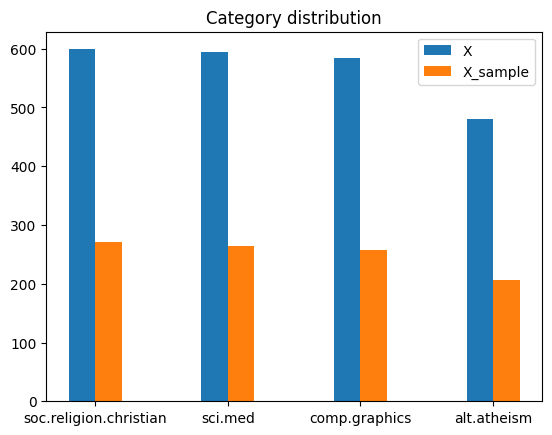

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
l = np.arange(len(X.category_name.value_counts().index))
width = 0.2
fig, ax = plt.subplots()
rects1 = ax.bar(l - width/2, X.category_name.value_counts(), width, label='X')
rects2 = ax.bar(l + width/2, X_sample.category_name.value_counts(), width, label='X_sample')
ax.set_title('Category distribution')
ax.set_xticks(l,X.category_name.value_counts().index)
ax.legend()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
a = X_counts[0:5, 0:100].toarray()

In [12]:
#find 1 position for 5th sample
ind = np.where(a==1)
#2nd 1 in 5th record
count_vect.get_feature_names_out()[ind[1][1]]

'01'

2nd 1 in 5th record is '01'

### >>> Exercise 11 (take home):
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

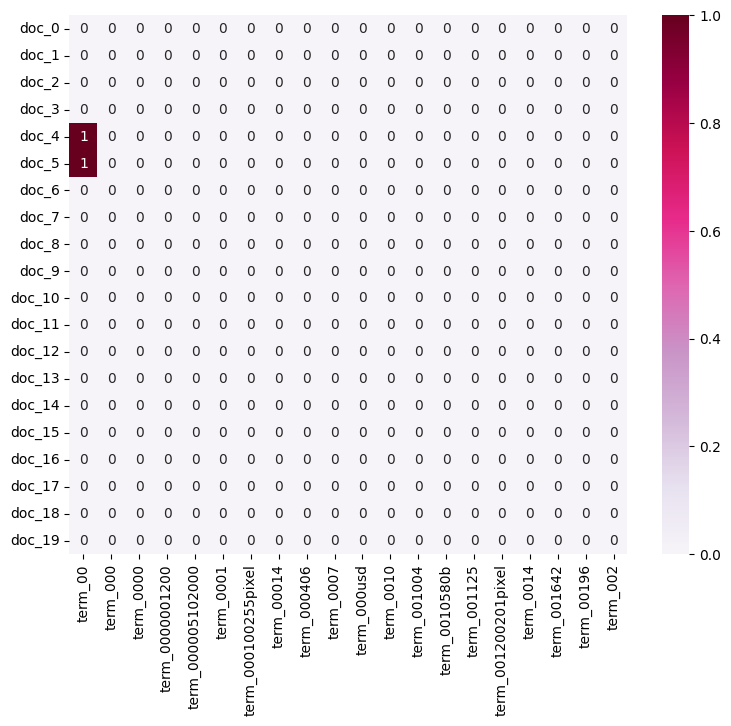

In [13]:
import seaborn as sns
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

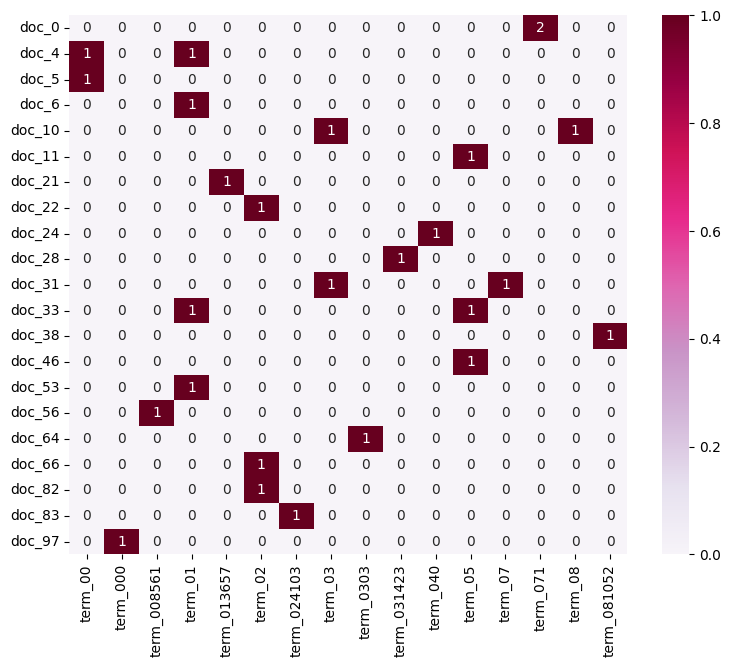

In [14]:
# Answer here

# first 200 terms 
plot_x1 = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:200]]
plot_x1 = np.array(plot_x1)
# first 100 document index
plot_y1 = ["doc_"+ str(i) for i in list(X.index)[0:100]]
plot_y1 = np.array(plot_y1)

plot_z = X_counts[0:100, 0:200].toarray()

# find which column sum is 0 and eliminate it
sum_col = plot_z.sum(axis=0)
col_remain = sum_col!=0
tmp_z = plot_z.T[col_remain,:].T

# find which row sum is 0 and eliminate it
sum_row = tmp_z.sum(axis=1)
row_remain = sum_row!=0
result_z = tmp_z[row_remain]

plot_x10 = plot_x1[col_remain]
plot_y10 = plot_y1[row_remain]

#plot
df_todraw = pd.DataFrame(result_z, columns = plot_x10, index = plot_y10)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

To plot it more efficiently, I eliminate the docs which do not contain the first 200 terms. Also, I eliminate the terms which do not show up in the first 100 docs.

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

(2257, 3)


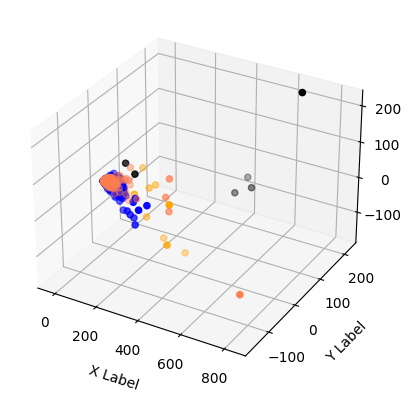

In [15]:
from sklearn.decomposition import PCA
col = ['coral', 'blue', 'black', 'orange']
X_reduced_3d = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced_3d.shape)
fig = plt.figure()
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced_3d[X['category_name'] == category].T[0]
    ys = X_reduced_3d[X['category_name'] == category].T[1]
    zx = X_reduced_3d[X['category_name'] == category].T[2]
    ax.scatter3D(xs, ys, zx, c=c, marker='o');

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nz Label')

plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [16]:
import plotly.express as px
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
px.bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])

### >>> Exercise 14 (take home):
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

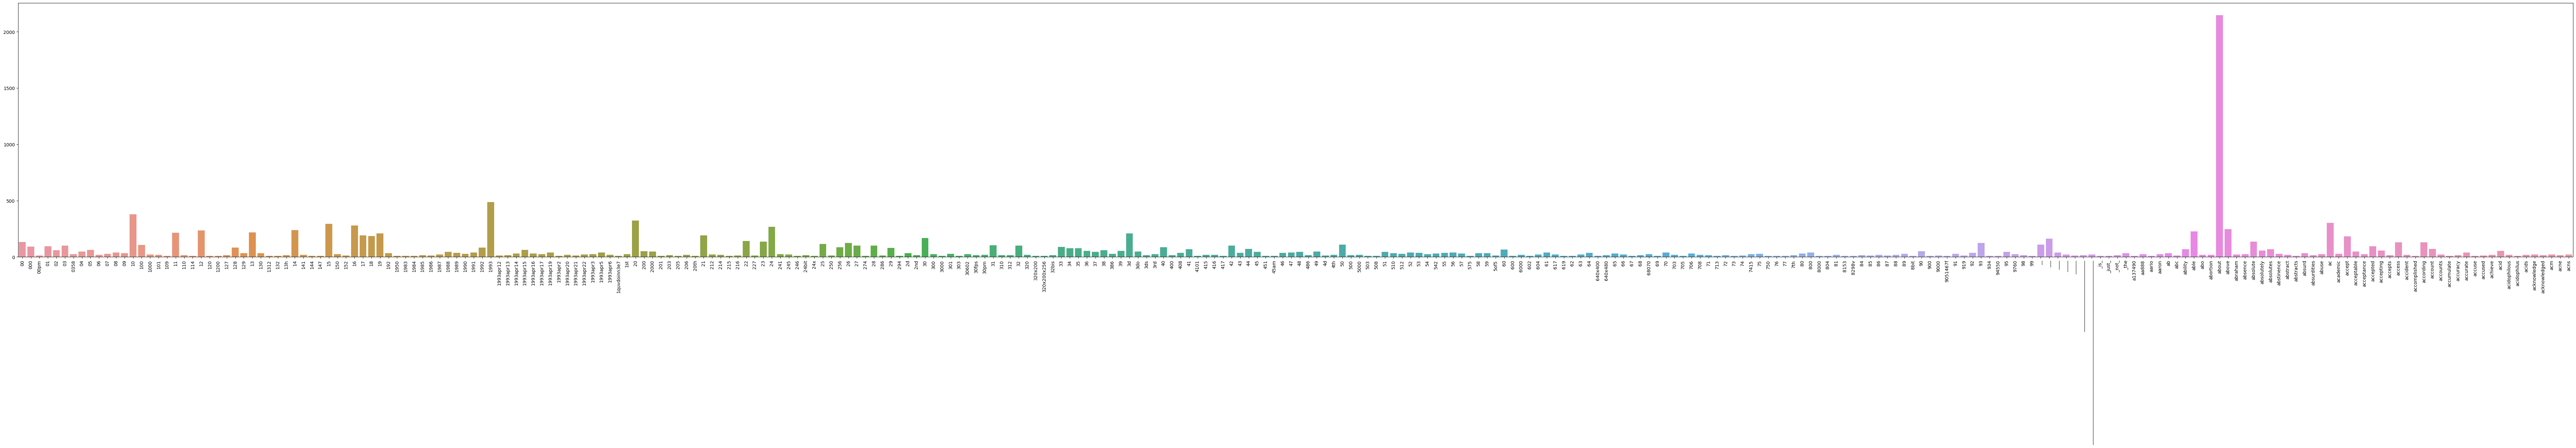

In [17]:
thr = int(np.percentile(term_frequencies, (80), method='midpoint'))

ind = term_frequencies > thr
term_frequencies_new = term_frequencies[ind]
terms = count_vect.get_feature_names_out()[ind]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=terms[:300], 
            y=term_frequencies_new[:300])
g.set_xticklabels(terms[:300], rotation = 90);

I eliminate the terms which are below 80%. 

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

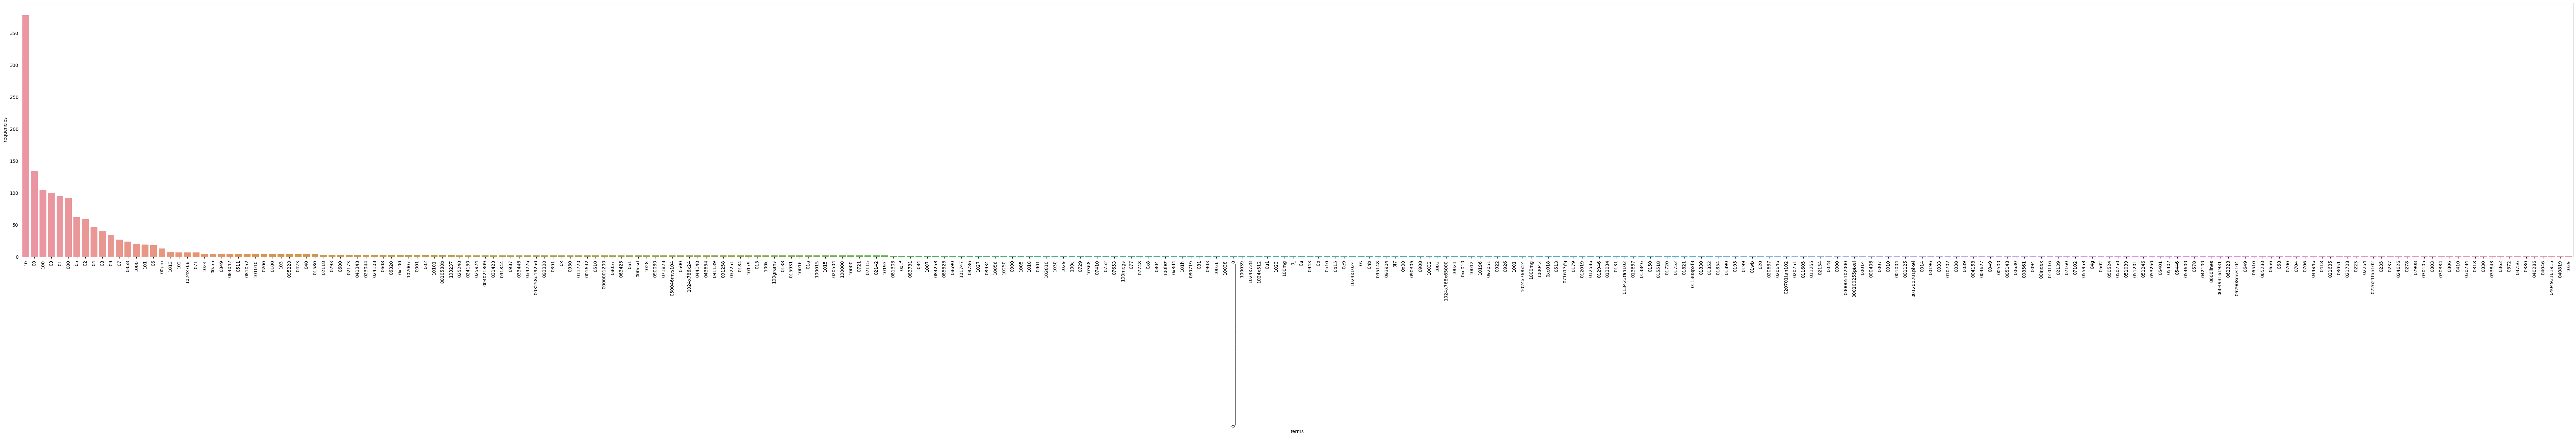

In [18]:
df = pd.DataFrame({"terms":count_vect.get_feature_names_out()[:300], "frequencies": term_frequencies[:300] })
plt.subplots(figsize=(100, 10))
g = sns.barplot(x='terms', y='frequencies', data=df, order=df.sort_values('frequencies', ascending = False).terms)
g.set_xticklabels(df.sort_values('frequencies', ascending = False).terms, rotation = 90);

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [19]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category  
0  [0, 1, 0, 0]  
1  [0, 1, 0, 0]  
2  [0, 0, 0, 1]  
3  [0, 0, 0, 1]  
4  [0, 0, 0, 1]  
5  [0, 0, 0, 1]  
6  [0, 0, 0, 1]  
7  [0, 0, 1, 0]  
8  [0, 0, 1, 0]

It works!

# Part2:New Dataset

### 1. Data prepare

In [36]:
import pandas as pd
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import nltk
%matplotlib inline

Folder = 'sentiment labelled sentences/'
filepath = ['amazon_cells_labelled.txt', 'imdb_labelled.txt','yelp_labelled.txt']
col = ['sentence', 'score','filename']
tmp = []
for i in range(len(filepath)):
    df = pd.read_csv(Folder+filepath[i],sep='\t',header=None,names=col,quoting=3)
    df.filename = filepath[i].split('_')[0]
    tmp.append(df)
df = tmp[0]
for i in range(1,len(tmp)):
    df = pd.concat([df,tmp[i]],ignore_index=True)
print(df)

                                               sentence  score filename
0     So there is no way for me to plug it in here i...      0   amazon
1                           Good case, Excellent value.      1   amazon
2                                Great for the jawbone.      1   amazon
3     Tied to charger for conversations lasting more...      0   amazon
4                                     The mic is great.      1   amazon
...                                                 ...    ...      ...
2995  I think food should have flavor and texture an...      0     yelp
2996                           Appetite instantly gone.      0     yelp
2997  Overall I was not impressed and would not go b...      0     yelp
2998  The whole experience was underwhelming, and I ...      0     yelp
2999  Then, as if I hadn't wasted enough of my life ...      0     yelp

[3000 rows x 3 columns]


# 2. Data Mining using Pandas

### 2.1 Missing Values

In [37]:
df.isnull()

sentence  score  filename
0        False  False     False
1        False  False     False
2        False  False     False
3        False  False     False
4        False  False     False
...        ...    ...       ...
2995     False  False     False
2996     False  False     False
2997     False  False     False
2998     False  False     False
2999     False  False     False

[3000 rows x 3 columns]

In [38]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             filename  
0  The amoung of missing records is:   
1                                   0

### 2.2 Dealing with Duplicate Data

In [39]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [40]:
###find out number of duplicated sentence
sum(df.duplicated('sentence'))

17

In [41]:
print('before drop duplicate',len(df))
df.drop_duplicates(keep=False, inplace=True)
print('after drop duplicate',len(df))

before drop duplicate 3000
after drop duplicate 2966


# 3. Data Preprocessing

### 3.1 Sampling

In [42]:
df_sample = df.sample(n=1000)
df_sample

sentence  score filename
988   It didn't work, people can not hear me when I ...      0   amazon
1814  You share General Loewenhielm's exquisite joy ...      1     imdb
2862  Hot dishes are not hot, cold dishes are close ...      0     yelp
1017  I'll put this gem up against any movie in term...      1     imdb
349   I was sitting in my vehicle, with the cradle o...      0   amazon
...                                                 ...    ...      ...
120   I've tried several different earpieces for my ...      1   amazon
2288                             This place is amazing!      1     yelp
929                  As I said above....PRETTY USELESS!      0   amazon
1735                               Nothing new there.        0     imdb
990   I'm really disappointed all I have now is a ch...      0   amazon

[1000 rows x 3 columns]

In [43]:
#df.score.value_counts()
tmp  = df.groupby(['filename','score'])
print(tmp.size())
tmp = tmp.size()
zero_count = [tmp[0],tmp[2],tmp[4]]
one_count = [tmp[1],tmp[3],tmp[5]]

filename  score
amazon    0        494
          1        486
imdb      0        498
          1        496
yelp      0        494
          1        498
dtype: int64


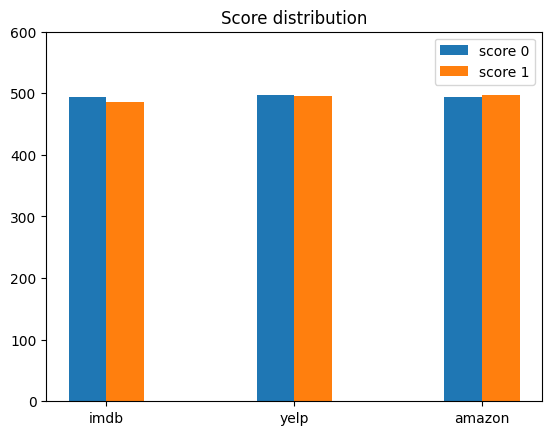

In [44]:
l = np.arange(len(df.filename.value_counts().index))
width = 0.2
fig, ax = plt.subplots()
rects1 = ax.bar(l - width/2,zero_count, width, label='score 0')
rects2 = ax.bar(l + width/2, one_count, width, label='score 1')
ax.set_title('Score distribution')
ax.set_xticks(l,df.filename.value_counts().index)
plt.ylim(0, 600)
ax.legend()

### 3.2 Feature Creation

In [45]:
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))
df[:10]

sentence  score filename  \
0  So there is no way for me to plug it in here i...      0   amazon   
1                        Good case, Excellent value.      1   amazon   
2                             Great for the jawbone.      1   amazon   
3  Tied to charger for conversations lasting more...      0   amazon   
4                                  The mic is great.      1   amazon   
5  I have to jiggle the plug to get it to line up...      0   amazon   
6  If you have several dozen or several hundred c...      0   amazon   
7        If you are Razr owner...you must have this!      1   amazon   
8                Needless to say, I wasted my money.      0   amazon   
9                   What a waste of money and time!.      0   amazon   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...  
4                           [The, mic, is, great, .]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...  
6  [If, you, have, several, dozen, or, several, h...  
7  [If, you, are, Razr, owner, ..., you, must, ha...  
8    [Needless, to, say, ,, I, wasted, my, money, .]  
9       [What, a, waste, of, money, and, time, !, .]

### 3.3 Feature subset selection

In [46]:
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence) #learn the vocabulary and return document-term matrix
df_counts2 = pd.DataFrame(df_counts.toarray()) 
df_counts_sum = df_counts2.sum() #count terms occur times
df_counts2 = df_counts2[df_counts_sum.sort_values().index[-20:]] #take top 20 
print(df_counts2)

      2022  637   5136  3121  1992  4888  2981  5067  3062  4527  1828  2313  \
0        0     0     0     0     0     0     0     0     0     0     1     2   
1        0     0     0     0     1     0     0     0     0     0     0     0   
2        1     0     0     0     0     0     0     0     0     0     1     0   
3        0     0     0     0     0     0     0     0     0     0     1     0   
4        1     0     0     0     0     0     0     0     0     0     0     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2961     0     0     0     0     0     0     0     0     0     0     0     0   
2962     0     0     0     0     0     0     0     0     0     0     0     0   
2963     0     0     0     0     0     0     0     0     2     0     0     0   
2964     0     0     0     0     0     0     0     0     0     0     0     0   
2965     0     0     0     0     0     0     1     0     0     0     0     1   

      4966  3096  4556  4607  2426  243

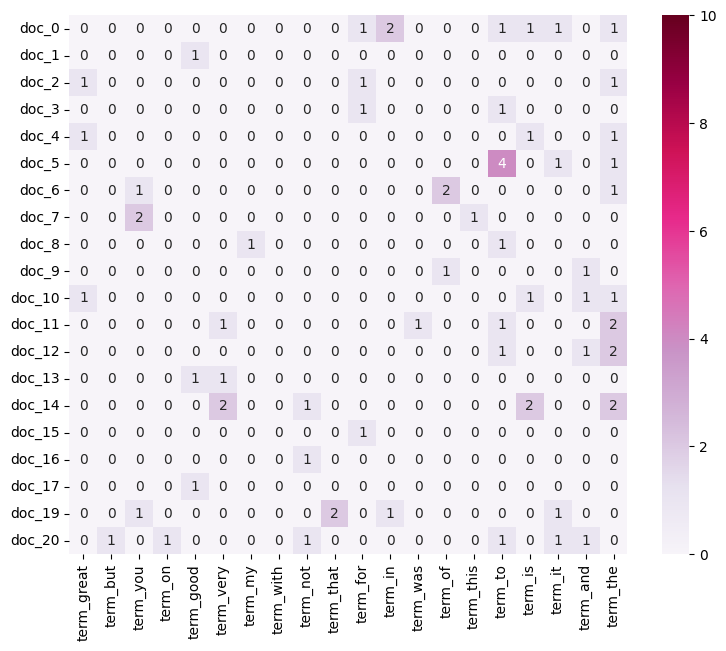

In [47]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[df_counts2.columns[:]]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_z = df_counts[0:20, df_counts2.columns[:]].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=10, annot=True)

### 3.4 Dimensionality Reduction

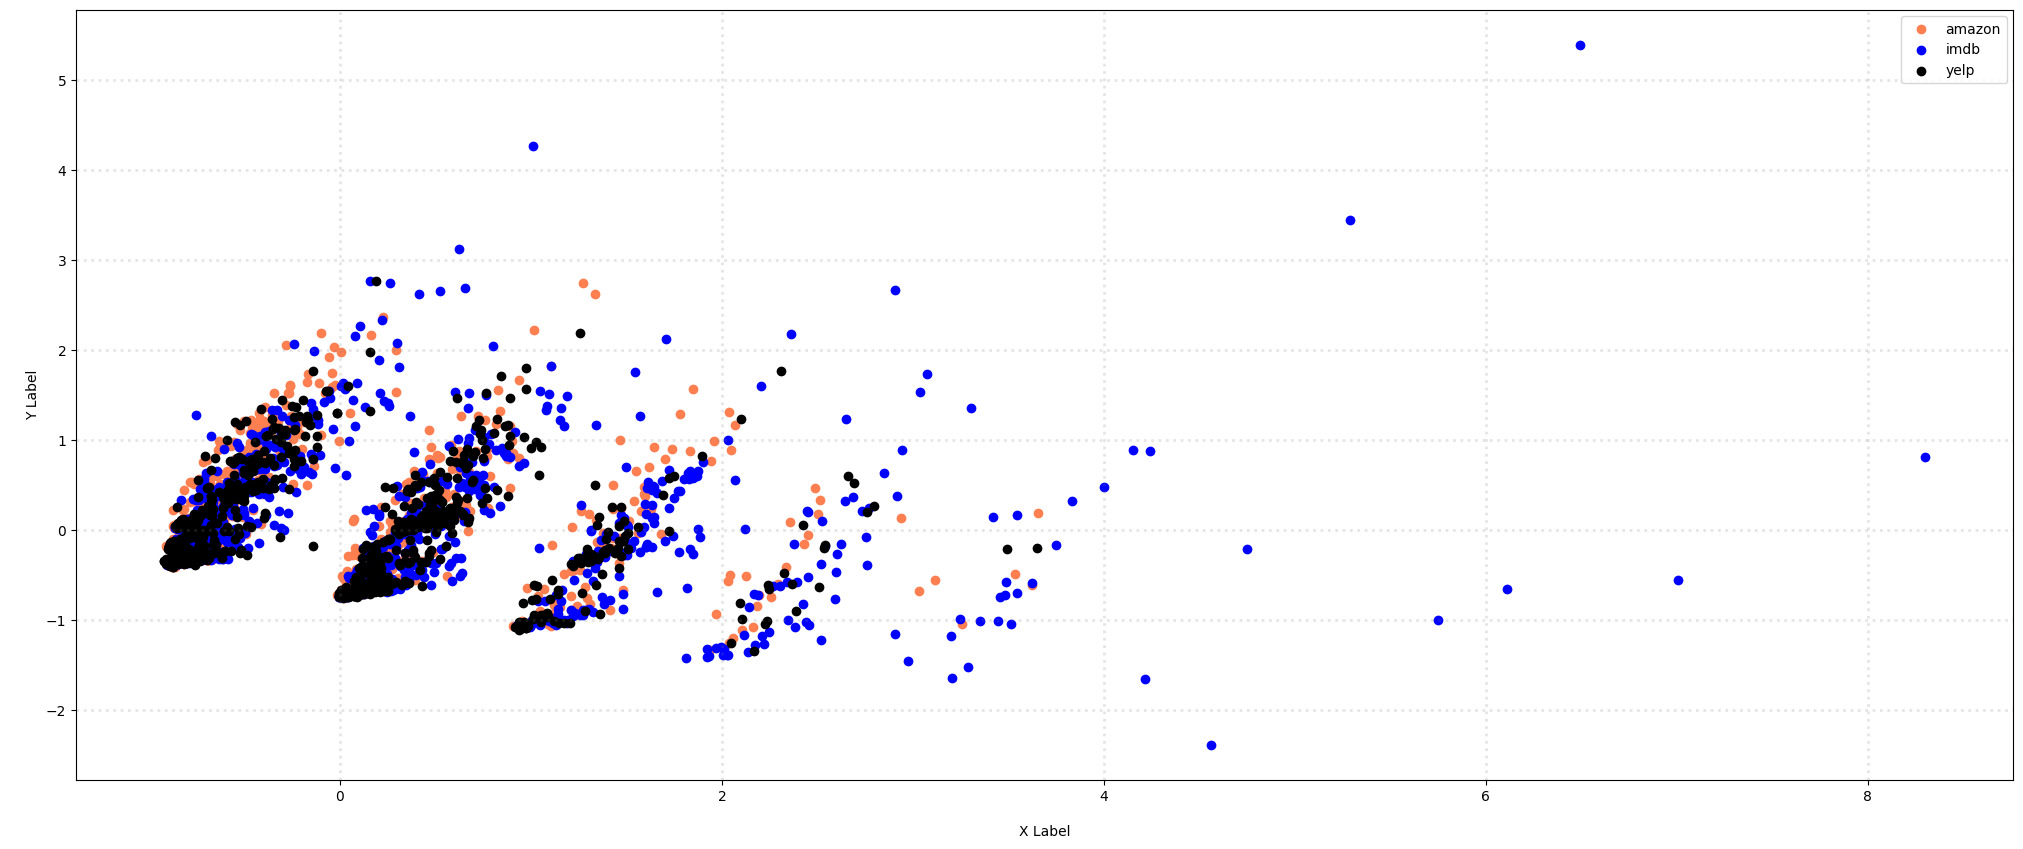

In [48]:
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
col = ['coral', 'blue', 'black']
categories = ['amazon','imdb','yelp']
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = df_reduced[df['filename'] == category].T[0]
    ys = df_reduced[df['filename'] == category].T[1]
    ax.scatter(xs, ys, c = c, marker='o',label=category)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
plt.legend()
plt.show()

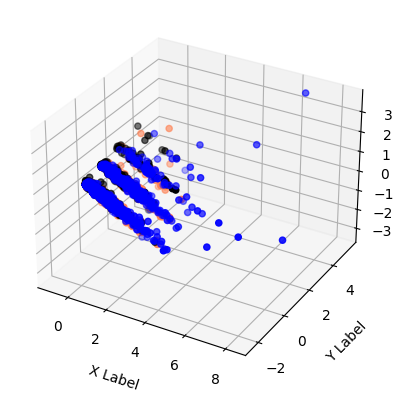

In [49]:
col = ['coral', 'blue', 'black']
df_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())
fig = plt.figure()
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = df_reduced[df['filename'] == category].T[0]
    ys = df_reduced[df['filename'] == category].T[1]
    zx = df_reduced[df['filename'] == category].T[2]
   
    ax.scatter3D(xs, ys, zx, c=c, marker='o');

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nz Label')

plt.show()

### 3.5 Attribute Transformation / Aggregation

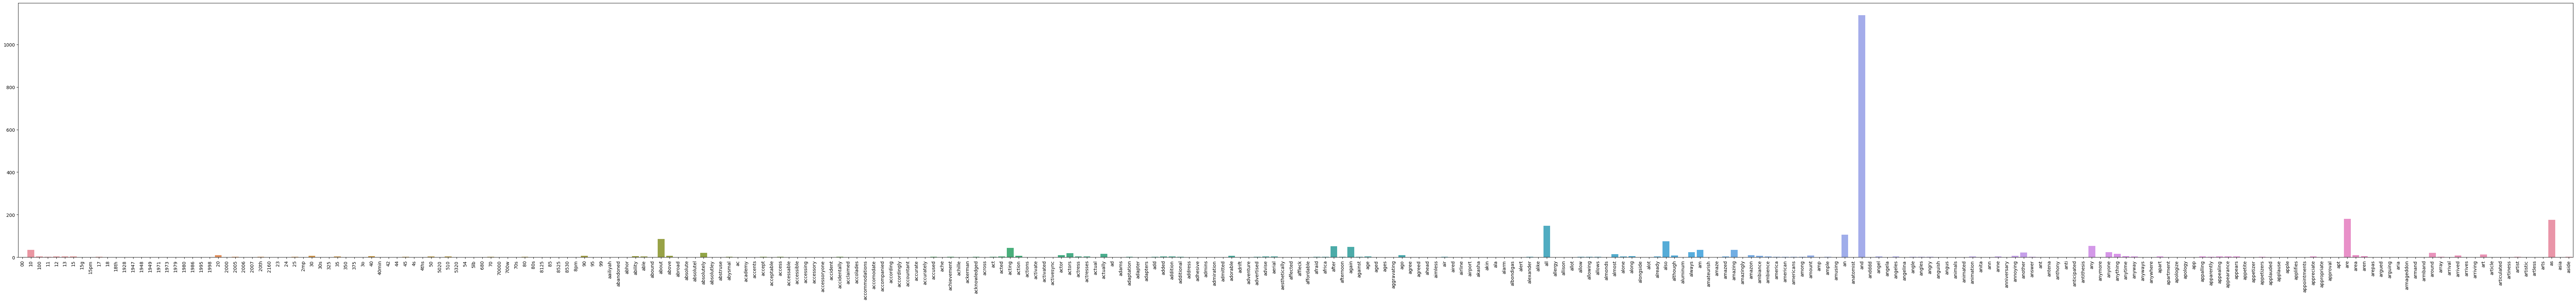

In [50]:
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence) #learn the vocabulary and return document-term matrix
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [51]:
### nicer interactive visualization
import plotly.express as px
px.bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])

### 3.6 Discretization and Binarization

In [52]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.filename)
df['bin_name'] = mlb.transform(df['filename']).tolist()
df[:9]

sentence  score filename  \
0  So there is no way for me to plug it in here i...      0   amazon   
1                        Good case, Excellent value.      1   amazon   
2                             Great for the jawbone.      1   amazon   
3  Tied to charger for conversations lasting more...      0   amazon   
4                                  The mic is great.      1   amazon   
5  I have to jiggle the plug to get it to line up...      0   amazon   
6  If you have several dozen or several hundred c...      0   amazon   
7        If you are Razr owner...you must have this!      1   amazon   
8                Needless to say, I wasted my money.      0   amazon   

                                            unigrams   bin_name  
0  [So, there, is, no, way, for, me, to, plug, it...  [1, 0, 0]  
1               [Good, case, ,, Excellent, value, .]  [1, 0, 0]  
2                      [Great, for, the, jawbone, .]  [1, 0, 0]  
3  [Tied, to, charger, for, conversations, lastin...  [1, 0, 0]  
4                           [The, mic, is, great, .]  [1, 0, 0]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...  [1, 0, 0]  
6  [If, you, have, several, dozen, or, several, h...  [1, 0, 0]  
7  [If, you, are, Razr, owner, ..., you, must, ha...  [1, 0, 0]  
8    [Needless, to, say, ,, I, wasted, my, money, .]  [1, 0, 0]

In [53]:
df[1000:1010]

sentence  score filename  \
1020  I can think of no other film where something v...      1     imdb   
1021  In other words, the content level of this film...      1     imdb   
1022  How can anyone in their right mind ask for any...      1     imdb   
1023  It's quite simply the highest, most superlativ...      1     imdb   
1024  Yes, this film does require a rather significa...      1     imdb   
1025      This short film certainly pulls no punches.        0     imdb   
1026  Graphics is far from the best part of the game.        0     imdb   
1027  This is the number one best TH game in the ser...      1     imdb   
1028                         It deserves strong love.        1     imdb   
1029                            It is an insane game.        1     imdb   

                                               unigrams   bin_name  
1020  [I, can, think, of, no, other, film, where, so...  [0, 1, 0]  
1021  [In, other, words, ,, the, content, level, of,...  [0, 1, 0]  
1022  [How, can, anyone, in, their, right, mind, ask...  [0, 1, 0]  
1023  [It, 's, quite, simply, the, highest, ,, most,...  [0, 1, 0]  
1024  [Yes, ,, this, film, does, require, a, rather,...  [0, 1, 0]  
1025  [This, short, film, certainly, pulls, no, punc...  [0, 1, 0]  
1026  [Graphics, is, far, from, the, best, part, of,...  [0, 1, 0]  
1027  [This, is, the, number, one, best, TH, game, i...  [0, 1, 0]  
1028                    [It, deserves, strong, love, .]  [0, 1, 0]  
1029                      [It, is, an, insane, game, .]  [0, 1, 0]

In [54]:
df[-9:]

sentence  score filename  \
2991         Spend your money and time some place else.      0     yelp   
2992  A lady at the table next to us found a live gr...      0     yelp   
2993            the presentation of the food was awful.      0     yelp   
2994           I can't tell you how disappointed I was.      0     yelp   
2995  I think food should have flavor and texture an...      0     yelp   
2996                           Appetite instantly gone.      0     yelp   
2997  Overall I was not impressed and would not go b...      0     yelp   
2998  The whole experience was underwhelming, and I ...      0     yelp   
2999  Then, as if I hadn't wasted enough of my life ...      0     yelp   

                                               unigrams   bin_name  
2991  [Spend, your, money, and, time, some, place, e...  [0, 0, 1]  
2992  [A, lady, at, the, table, next, to, us, found,...  [0, 0, 1]  
2993  [the, presentation, of, the, food, was, awful, .]  [0, 0, 1]  
2994  [I, ca, n't, tell, you, how, disappointed, I, ...  [0, 0, 1]  
2995  [I, think, food, should, have, flavor, and, te...  [0, 0, 1]  
2996                     [Appetite, instantly, gone, .]  [0, 0, 1]  
2997  [Overall, I, was, not, impressed, and, would, ...  [0, 0, 1]  
2998  [The, whole, experience, was, underwhelming, ,...  [0, 0, 1]  
2999  [Then, ,, as, if, I, had, n't, wasted, enough,...  [0, 0, 1]

# 4. Data Exploration

In [55]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [56]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [57]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# Part 3

### Generate meaningful new data visualizations

Reference from [this website](https://tech.havocfuture.tw/blog/python-wordcloud-jieba)

Generate with whole data

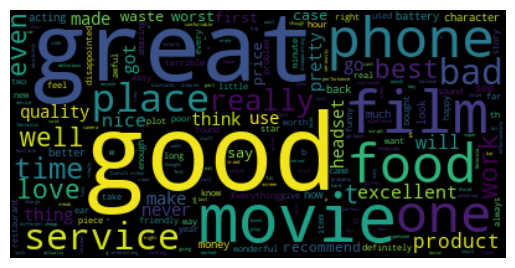

In [58]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(df.sentence.to_string())
plt.figure()
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

Generate with filename = amazon

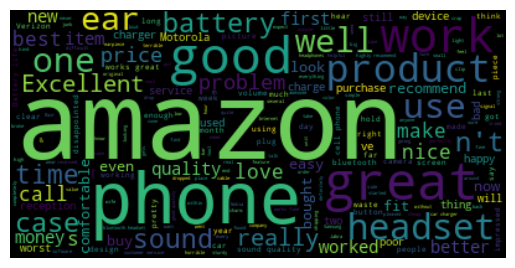

In [59]:
wordcloud_a = WordCloud().generate(df[df['filename']=='amazon'].to_string())
plt.figure()
plt.imshow(wordcloud_a,interpolation="bilinear")
plt.axis("off")
plt.show()

Generate with filename = imdb

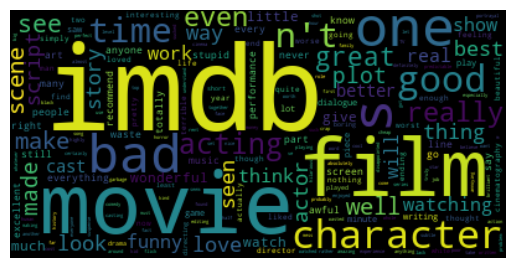

In [60]:
wordcloud_i = WordCloud().generate(df[df['filename']=='imdb'].to_string())
plt.figure()
plt.imshow(wordcloud_i,interpolation="bilinear")
plt.axis("off")
plt.show()

Generate with filename = yelp

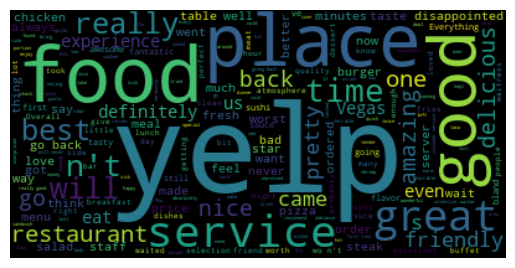

In [61]:
wordcloud_y = WordCloud().generate(df[df['filename']=='yelp'].to_string())
plt.figure()
plt.imshow(wordcloud_y,interpolation="bilinear")
plt.axis("off")
plt.show()

### Generate new TF-IDF features

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
# initialise TfidfVectorizer
vectorizer = TfidfVectorizer(smooth_idf=True)
tfidf = vectorizer.fit_transform(df.sentence)
print(tfidf[0])

  (0, 1012)	0.3986168387492481
  (0, 646)	0.22333547273087015
  (0, 1981)	0.23146985374950851
  (0, 4791)	0.3320558096799929
  (0, 4833)	0.27546430092514007
  (0, 4529)	0.08650236048704857
  (0, 2157)	0.2227159333830498
  (0, 2313)	0.2951617172401695
  (0, 2431)	0.11953102323931236
  (0, 3385)	0.30874481545976773
  (0, 4607)	0.12738906128503263
  (0, 2808)	0.22860251631494138
  (0, 1828)	0.15661880776106893
  (0, 4985)	0.24912565648943613
  (0, 3042)	0.22333547273087015
  (0, 2426)	0.12069328594000049
  (0, 4543)	0.2075378632582399
  (0, 4159)	0.1873278991359609


### Naive Bayes Classifier

In [64]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Bernoulli naive Bayes

In [65]:
from sklearn.naive_bayes import BernoulliNB

## use TFIDF as feature
X = tfidf
Y = df.score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
print('TFIDF acc:', bnb.score(X_test, Y_test))

## use terms counts as feature
X = df_counts
Y = df.score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
print('terms counts acc:', bnb.score(X_test, Y_test))

TFIDF acc: 0.8153638814016172
terms counts acc: 0.807277628032345


Multinomial naive Bayes

In [66]:
from sklearn.naive_bayes import MultinomialNB

## use TFIDF as feature
X = tfidf
Y = df.score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
print('TFIDF acc:', mnb.score(X_test, Y_test))

## use terms counts as feature
X = df_counts
Y = df.score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
print('terms counts acc:', mnb.score(X_test, Y_test))

TFIDF acc: 0.8274932614555256
terms counts acc: 0.793800539083558


Gaussian Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB

## use TFIDF as feature
X = tfidf
Y = df.score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
gnb = GaussianNB()
gnb.fit(X_train.toarray(), Y_train)
print('TFIDF acc:', gnb.score(X_test.toarray(), Y_test))

## use terms counts as feature
X = df_counts
Y = df.score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
gnb = GaussianNB()
gnb.fit(X_train.toarray(), Y_train)
print('terms counts acc:', gnb.score(X_test.toarray(), Y_test))


TFIDF acc: 0.6900269541778976
terms counts acc: 0.6657681940700808


TF-IDF shows the importance of terms in data by using both term frequency and inverse document frequency.If only use term frequency cannot show the importance of terms because there are some stop words which are not that important. 

# Part 4

In [ ]:
"""
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
"""

This code is time consuming.Becasue X_counts[:,j].toarray() need to copy every loop. If we turn X_counts into array first and use np.sum() instead of sum, I think it may be more efficient.